In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv("/content/Bankruptcy (2).csv")
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [8]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [9]:
df.shape

(250, 7)

In [10]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Exploratory Data Analysis

In [11]:
df.isnull().sum() # no missing values

,0
industrial_risk,0
management_risk,0
financial_flexibility,0
credibility,0
competitiveness,0
operating_risk,0
class,0


In [12]:
df.duplicated().sum()   # duplicates identified

np.int64(147)

In [13]:
df.drop_duplicates(inplace=True)  #  duplicates removed
df.duplicated().sum()

np.int64(0)

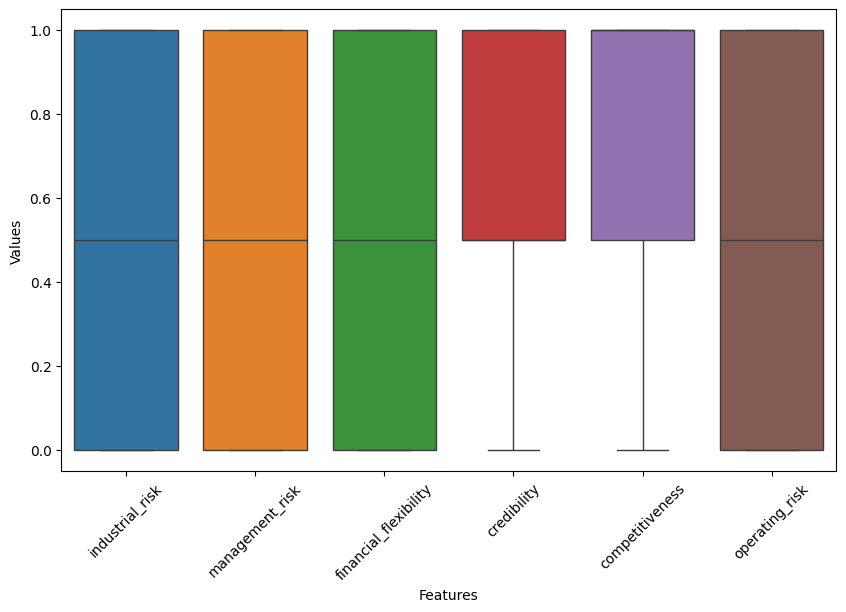

In [14]:
plt.figure(figsize=(10,6))  # no outliers identified
sns.boxplot(df.drop(columns=['class']))
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

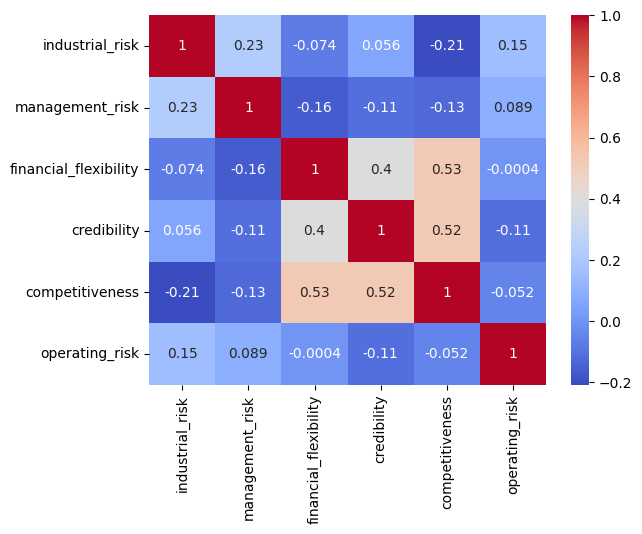

In [15]:
corr= df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

### Model Building

In [16]:
df['class'].unique()  # target columns

array(['bankruptcy', 'non-bankruptcy'], dtype=object)

In [17]:
label= LabelEncoder()   # encoding target column using Labelencoder
df['class']= label.fit_transform(df['class'])
df['class'].unique()

array([0, 1])

In [18]:
X= df.drop(columns=['class'])  # features
y= df['class']  # target

In [19]:
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.8,shuffle=True,random_state=42)  # splitting dataset

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(82, 6)
(21, 6)
(82,)
(21,)


In [21]:
scaler= StandardScaler()                   # Feature scaling using StandardScaler
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

#### Model Training & Evaluation

In [22]:
original_models= {'Logistic Regression':LogisticRegression(),
                  'K-Nearest Neighbors': KNeighborsClassifier(),
                  'Decision Tree': DecisionTreeClassifier(),
                  'Random Forest': RandomForestClassifier(),
                  'Gradient Boosting': GradientBoostingClassifier(),
                 'XG Boosting': XGBClassifier()}

In [23]:
for name,model in original_models.items():
    model.fit(X_train,y_train)
    y_pred= model.predict(X_test)

    print(f'{name} Accuracy: {accuracy_score(y_test,y_pred):.2f}')
    print(classification_report(y_test,y_pred))

Logistic Regression Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.94      1.00      0.97        16

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21

K-Nearest Neighbors Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        16

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Decision Tree Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.94      1.00      0.97        16

    accuracy                           0.95        21
   macro avg       0.97      

Deployment

In [24]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


In [32]:
%%writefile app.py
import streamlit as st
st.title("Bankruptcy Prediction")
st.write("Enter the features to predict bankruptcy")


Overwriting app.py


In [33]:
#Step3:
!wget  -q -o - ipv4.canhanzip.com

--2025-03-26 07:18:57--  http://%20-q/
Resolving  -q ( -q)... failed: Name or service not known.
wget: unable to resolve host address ‘ -q’
--2025-03-26 07:18:57--  http://ipv4.canhanzip.com/
Resolving ipv4.canhanzip.com (ipv4.canhanzip.com)... failed: Name or service not known.
wget: unable to resolve host address ‘ipv4.canhanzip.com’


In [36]:
!pip install streamlit
!pip install joblib
!pip install numpy
!pip install pandas
import streamlit as st
import joblib
import numpy as np
import pandas as pd

# Assuming you trained and saved your model earlier,
# you need to save it using joblib.dump() first:
# Replace 'original_models' with your trained model dictionary

# Choose the model you want to save, for example, XGBClassifier:
# selected_model = original_models['XG Boosting']
# joblib.dump(selected_model, 'model.pkl')
# joblib.dump(scaler, 'scaler.pkl')

# Load the trained model and scaler
try:
    model = joblib.load("model.pkl")
    scaler = joblib.load("scaler.pkl")
except FileNotFoundError:
    st.error("Trained model and scaler files not found. Please train and save the model first.")
    st.stop()  # Stop execution if files are not found

# Rest of your Streamlit UI code below...

# Load the trained model and scaler
model = joblib.load("model.pkl")
scaler = joblib.load("scaler.pkl")

# Streamlit UI
st.title("🏦 Bankruptcy Prediction System")
st.write("Enter financial details to predict bankruptcy risk.")

# Collect user input
feature_names = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5']  # Replace with actual feature names
user_input = []

for feature in feature_names:
    value = st.number_input(f"Enter {feature}", value=0.0)
    user_input.append(value)

# Convert input to NumPy array and scale it
user_input = np.array(user_input).reshape(1, -1)
user_input = scaler.transform(user_input)

# Predict button
if st.button("Predict"):
    prediction = model.predict(user_input)
    result = "Bankrupt" if prediction[0] == 1 else "Not Bankrupt"
    st.success(f"Prediction: {result}")


2025-03-26 07:48:22.799 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 07:48:22.800 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 07:48:22.801 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


FileNotFoundError: [Errno 2] No such file or directory: 'model.pkl'

In [ ]:
#Step4:
! streamlit run app.py & npx localtunnel --port 8501